## TensorFlow를 사용하여 현재 시스템에서 GPU를 사용할 수 있는지 확인하고, 사용할 수 있다면 GPU 디바이스 정보를 출력하는 코드

In [1]:
import tensorflow as tf

# GPU를 사용할 수 있는지 확인
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU를 사용할 수 있습니다.")
    # GPU 디바이스 정보 출력
    for gpu in gpu_available:
        print("GPU 디바이스:", gpu)
else:
    print("GPU를 사용할 수 없습니다.")

GPU를 사용할 수 있습니다.
GPU 디바이스: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from keras import layers

## 파일 경로 및 파일명 리스트 설정:
#### 파일 경로와 파일명 리스트를 설정합니다. 이 리스트는 불러올 파일들의 이름을 담고 있습니다.

## 데이터프레임을 저장할 빈 리스트 생성:
#### 여러 파일로부터 읽어온 데이터를 저장할 빈 리스트를 생성합니다.

## 각 파일을 읽어와 데이터프레임 리스트에 추가:
#### filename 리스트를 반복하며 각 파일을 읽어옵니다.
#### pd.read_csv를 사용하여 공백으로 구분된 텍스트 파일을 데이터프레임으로 읽어옵니다.
#### filename에서 사용자의 번호를 추출하여 User_Number라는 새로운 열로 추가합니다.
#### 읽어온 데이터프레임을 dfs 리스트에 추가합니다.

## 모든 데이터프레임을 하나로 병합:
#### pd.concat을 사용하여 dfs 리스트에 있는 모든 데이터프레임을 하나의 데이터프레임으로 병합합니다.
#### ignore_index=True 옵션을 사용하여 인덱스를 무시하고 새로운 인덱스를 할당합니다.

## 열 이름 설정:
#### 각 열의 이름을 설정합니다. 열 이름을 문자열로 설정하고, split 메서드를 사용하여 리스트로 변환합니다.
#### 데이터프레임의 열 이름을 설정합니다.

## 데이터프레임 출력:
#### 최종 데이터프레임을 출력합니다.

In [3]:
import pandas as pd

filepath = 'C:/Users/GACHON/Desktop/AiStudy/data/Dataset/'
# Load all 9 files as a list
filenames = [
    'S01R01.txt', 'S01R02.txt', 'S02R01.txt', 'S02R02.txt', 'S03R01.txt', 'S03R02.txt',
    'S03R03.txt', 'S04R01.txt', 'S05R01.txt', 'S05R02.txt', 'S06R01.txt', 'S06R02.txt',
    'S07R01.txt', 'S07R02.txt', 'S08R01.txt', 'S09R01.txt', 'S10R01.txt'
]

# Create an empty list to store DataFrames
dfs = []

# Iterate over each filename, load the CSV file, and append the DataFrame to the list
for filename in filenames:
    df = pd.read_csv(filepath + filename, sep="\s+", header=None)
    user_number = int(filename[1:3])
    df['User_Number'] = user_number
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Set column names
columns = "TS, Ankel_1,Ankel_2,Ankel_3,Thigh_1,Thigh_2,Thigh_3,Trunk_1,Trunk_2,Trunk_3,status,User_Number".split(",")
df.columns = columns

print(df)

              TS   Ankel_1  Ankel_2  Ankel_3  Thigh_1  Thigh_2  Thigh_3  \
0             15        70       39     -970        0        0        0   
1             31        70       39     -970        0        0        0   
2             46        60       49     -960        0        0        0   
3             62        60       49     -960        0        0        0   
4             78        50       39     -960        0        0        0   
...          ...       ...      ...      ...      ...      ...      ...   
1917882  3020296      -131      107     -960        0        0        0   
1917883  3020312      -121      127     -970        0        0        0   
1917884  3020328      -141      117     -960        0        0        0   
1917885  3020343      -131      127     -980        0        0        0   
1917886  3020359      -141        0        0        0        0        0   

         Trunk_1  Trunk_2  Trunk_3  status  User_Number  
0              0        0        0       

In [4]:
df.head()

,TS,Ankel_1,Ankel_2,Ankel_3,Thigh_1,Thigh_2,Thigh_3,Trunk_1,Trunk_2,Trunk_3,status,User_Number
0,15,70,39,-970,0,0,0,0,0,0,0,1
1,31,70,39,-970,0,0,0,0,0,0,0,1
2,46,60,49,-960,0,0,0,0,0,0,0,1
3,62,60,49,-960,0,0,0,0,0,0,0,1
4,78,50,39,-960,0,0,0,0,0,0,0,1


#### 데이터프레임의 구조를 요약하여 표시합니다. 이를 통해 데이터프레임의 열, 데이터 타입, 누락된 값의 수 등 중요한 정보를 확인할 수 있습니다.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917887 entries, 0 to 1917886
Data columns (total 12 columns):
 #   Column       Dtype
---  ------       -----
 0   TS           int64
 1    Ankel_1     int64
 2   Ankel_2      int64
 3   Ankel_3      int64
 4   Thigh_1      int64
 5   Thigh_2      int64
 6   Thigh_3      int64
 7   Trunk_1      int64
 8   Trunk_2      int64
 9   Trunk_3      int64
 10  status       int64
 11  User_Number  int64
dtypes: int64(12)
memory usage: 175.6 MB


#### 데이터프레임의 각 열에 대한 요약 통계를 제공

In [6]:
df.describe()

,TS,Ankel_1,Ankel_2,Ankel_3,Thigh_1,Thigh_2,Thigh_3,Trunk_1,Trunk_2,Trunk_3,status,User_Number
count,1.917887e+06,1.917887e+06,1.917887e+06,1.917887e+06,1.917887e+06,1.917887e+06,1.917887e+06,1.917887e+06,1.917887e+06,1.917887e+06,1.917887e+06,1.917887e+06
mean,1.068270e+06,-5.121767e+01,8.269251e+02,5.814148e+01,-3.909704e+01,6.078131e+02,-3.851133e+01,4.953984e+01,7.706783e+02,-1.105940e+02,6.526036e-01,5.323289e+00
std,7.525219e+05,5.241233e+02,4.924929e+02,5.544153e+02,5.356087e+02,4.343619e+02,4.813304e+02,2.822827e+02,4.180118e+02,4.095316e+02,5.850132e-01,2.838412e+00
min,1.500000e+01,-3.123400e+04,-3.276300e+04,-3.148800e+04,-2.184600e+04,-2.967300e+04,-2.431800e+04,-5.019000e+03,-3.400000e+03,-4.786000e+03,0.000000e+00,1.000000e+00
25%,4.407030e+05,-2.120000e+02,7.740000e+02,6.900000e+01,-2.810000e+02,2.590000e+02,-9.000000e+01,-8.700000e+01,8.000000e+02,-1.940000e+02,0.000000e+00,3.000000e+00
50%,9.297030e+05,-2.000000e+01,9.700000e+02,2.070000e+02,-2.700000e+01,6.750000e+02,9.000000e+01,3.800000e+01,9.610000e+02,-3.800000e+01,1.000000e+00,5.000000e+00
75%,1.596812e+06,1.210000e+02,1.019000e+03,3.260000e+02,1.900000e+02,9.620000e+02,2.320000e+02,1.940000e+02,1.009000e+03,1.060000e+02,1.000000e+00,8.000000e+00
max,3.058390e+06,3.072500e+04,3.200200e+04,3.174400e+04,2.662500e+04,3.259800e+04,2.841800e+04,6.707000e+03,2.429800e+04,4.339000e+03,2.000000e+00,1.000000e+01


In [7]:
df.columns

Index(['TS', ' Ankel_1', 'Ankel_2', 'Ankel_3', 'Thigh_1', 'Thigh_2', 'Thigh_3',
       'Trunk_1', 'Trunk_2', 'Trunk_3', 'status', 'User_Number'],
      dtype='object')

In [8]:
df['status'].value_counts()

status
1    1030050
0     777052
2     110785
Name: count, dtype: int64

#### 데이터프레임의 크기(행과 열의 수)

In [9]:
df.shape

(1917887, 12)

In [10]:
# status 열에서 값이 0인 행 제거
df = df[df['status'] != 0]

# status 열에서 값이 1인 행을 0으로, 값이 2인 행을 1로 바꾸기
df['status'] = df['status'].replace({1: 0, 2: 1})

In [11]:
df['status'].value_counts()

status
0    1030050
1     110785
Name: count, dtype: int64

In [12]:
df.shape

(1140835, 12)

##  각 사용자별 레코드 수를 시각화

C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


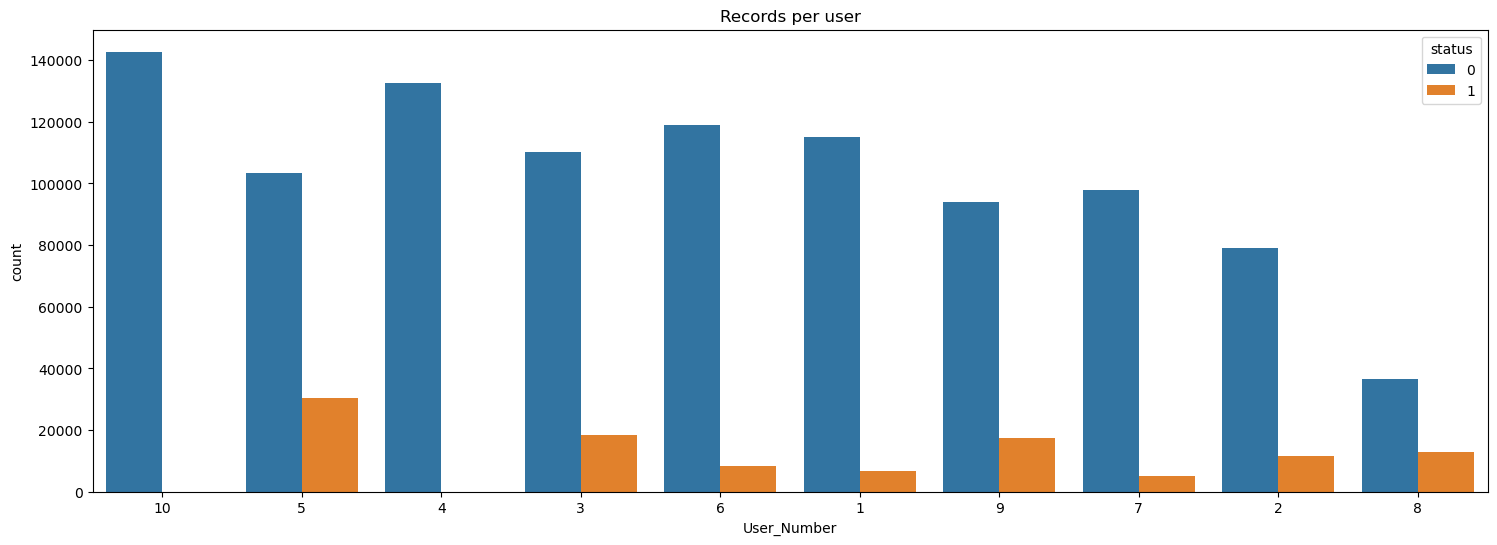

In [13]:
plt.figure(figsize=(18, 6))
sns.countplot(x = "User_Number", hue="status", data = df,
              order = df.User_Number.value_counts().index)
plt.title("Records per user");

## 주어진 코드는 데이터프레임 df에서 특정 열을 선택하여 예측 변수(X)와 목표 변수(y)를 생성하는 부분
## 데이터프레임 df에서 예측 변수로 사용할 열을 선택합니다. 여기서는 다음 열을 선택합니다:
####  TS (시간 스탬프)
####  Ankel_1, Ankel_2, Ankel_3 (발목 센서 데이터)
####  Thigh_1, Thigh_2, Thigh_3 (허벅지 센서 데이터)
####  Trunk_1, Trunk_2, Trunk_3 (몸통 센서 데이터)
####  .values를 사용하여 데이터프레임을 넘파이 배열로 변환합니다. 이렇게 하면 머신러닝 모델에서 사용할 수 있는 형식으로 데이터가 준비됩니다.

## 목표 변수 생성:
####  .reshape(-1, 1)를 사용하여 배열의 형상을 (n_samples, 1)로 변환합니다. 여기서 -1은 자동으로 행의 수를 맞추도록 하는 역할을 합니다.

In [14]:
X = df[['TS', ' Ankel_1', 'Ankel_2', 'Ankel_3', 'Thigh_1', 'Thigh_2', 'Thigh_3',
       'Trunk_1', 'Trunk_2', 'Trunk_3']].values
y = df['status'].values.reshape(-1, 1)

## 데이터 크기 출력
#### 첫 번째 분할: 전체 데이터를 학습 세트와 테스트 세트로 분할합니다.
#### 두 번째 분할: 학습 세트를 다시 학습 세트와 검증 세트로 분할합니다.



In [15]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify= y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(730134, 10) (730134, 1)
(228167, 10) (228167, 1)


#### X_train.shape[0]: 학습 세트의 샘플 수입니다.
#### X_train.shape[1]: 학습 세트의 피처 수입니다.
#### .reshape((X_train.shape[0], X_train.shape[1], 1)): 각 샘플의 피처 수에 차원을 추가하여 (샘플 수, 피처 수, 1) 형태로 변환합니다.
#### X_train의 새로운 형태를 출력합니다.
#### X_test의 새로운 형태를 출력합니다.


In [16]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(730134, 10, 1)
(228167, 10, 1)


## 1.OneHotEncoder 객체 생성
#### handle_unknown="ignore": 훈련 시 보지 못한 새로운 카테고리 값이 나타나면 무시합니다.
#### sparse_output=False: 인코딩된 결과를 희소 행렬이 아닌 밀집 행렬로 반환합니다. (sparse_output은 sklearn 버전에 따라 다를 수 있음)
## 2.학습 데이터에 대해 인코더 학습
#### y_train 데이터를 이용하여 인코더를 학습시킵니다. 즉, y_train에 존재하는 고유 클래스들을 인코더가 학습합니다.
## 3.데이터 변환:
#### y_train, y_test, y_val 데이터를 원-핫 인코딩 방식으로 변환합니다. 이 결과 각 클래스는 고유한 원-핫 벡터로 변환됩니다.
## 4.고유 클래스 수 확인:
#### np.unique(y_train_hot)를 이용하여 원-핫 인코딩된 y_train_hot의 고유한 값(클래스) 수를 계산합니다.
#### len() 함수를 통해 고유 클래스의 개수를 반환합니다.

In [17]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc.fit(y_train)

y_train_hot = enc.transform(y_train) 
y_test_hot = enc.transform(y_test) 
y_val_hot = enc.transform(y_val)

In [18]:
n_status = len(np.unique(y_train_hot))
n_status

2

#### 1. Transformer Encoder 함수 정의
##### Transformer의 인코더 부분을 정의합니다. 이 부분은 입력 데이터를 받아서 Multi-Head Attention과 Feed Forward Network를 적용한 결과를 반환합니다.
#### 2. 모델 구축 함수 정의
##### Transformer 인코더 블록을 포함한 모델을 정의합니다.
#### 3. 모델 설정 및 컴파일
##### 모델을 빌드하고 컴파일합니다.
##### transformer_encoder 함수는 입력 데이터를 Transformer 인코더 구조로 처리합니다.
##### build_model 함수는 Transformer 인코더 블록과 MLP(다층 퍼셉트론) 블록을 포함하는 전체 모델을 빌드합니다.
##### 마지막으로 모델을 컴파일하여 훈련할 준비를 합니다.
##### categorical_crossentropy 손실 함수와 Adam 옵티마이저를 사용하여 다중 클래스 분류 작업을 수행합니다.

In [19]:
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train_hot = y_train_hot[idx]

## idx = np.random.permutation(len(X_train)):
#### np.random.permutation 함수는 주어진 길이의 배열을 무작위로 섞은 후 그 배열을 반환합니다.
#### len(X_train)는 X_train 데이터의 길이를 의미합니다.
#### 따라서 idx는 X_train 데이터의 인덱스를 무작위로 섞은 배열이 됩니다.

## X_train = X_train[idx]:
#### X_train 데이터를 idx 배열의 순서대로 재배열합니다.
#### 즉, X_train 데이터가 무작위로 섞이게 됩니다.

## y_train_hot = y_train_hot[idx]:
#### y_train_hot 데이터도 idx 배열의 순서대로 재배열하여 X_train과 동일한 순서로 섞이게 합니다.
#### 이를 통해 X_train과 y_train_hot 간의 대응 관계가 유지됩니다.

In [20]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

## 입력 매개변수:
#### inputs: 인코더 블록에 입력되는 텐서.
#### head_size: 각 어텐션 헤드의 크기.
#### num_heads: 멀티헤드 어텐션의 헤드 수.
#### ff_dim: 피드 포워드 네트워크의 중간 층의 차원.
#### dropout: 드롭아웃 비율

## 어텐션 및 정규화:
#### layers.MultiHeadAttention: 멀티헤드 어텐션 층을 사용하여 입력 데이터 간의 관계를 학습합니다.
#### layers.Dropout: 드롭아웃 층을 사용하여 과적합을 방지합니다.
#### layers.LayerNormalization: 층 정규화를 사용하여 안정적인 학습을 돕습니다.
#### res = x + inputs: 잔차 연결(Residual Connection)을 사용하여 그래디언트 소실 문제를 완화합니다.

## 피드 포워드 부분:
#### layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu"): 일차원 컨볼루션 층을 사용하여 피드 포워드 네트워크의 첫 번째 층을 정의합니다.
#### layers.Dropout: 드롭아웃 층을 추가하여 과적합을 방지합니다.
#### #### layers.Conv1D(filters=inputs.shape[-1], kernel_size=1): 두 번째 일차원 컨볼루션 층을 사용하여 원래 입력 크기로 되돌립니다.
#### layers.LayerNormalization: 다시 정규화를 사용하여 안정적인 학습을 돕습니다.
#### return x + res: 최종적으로 잔차 연결을 통해 입력과 출력의 관계를 보존합니다.

In [21]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_status, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)

In [22]:
input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 1)]      0           []                               
                                                                                                  
 multi_head_attention (MultiHea  (None, 10, 1)       7169        ['input_1[0][0]',                
 dAttention)                                                      'input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 10, 1)        0           ['multi_head_attention[0][0]']   
                                                                                                  
 layer_normalization (LayerNorm  (None, 10, 1)       2           ['dropout[0][0]']            

### 트랜스포머 기반 모델을 구축하고, 이를 컴파일한 후 요약을 출력합니다. 다음과 같은 부분으로 구성되어 있습니다:

###### 모델 구축: build_model 함수를 사용하여 트랜스포머 블록을 포함한 모델을 만듭니다.
###### 모델 컴파일: 손실 함수, 최적화기, 평가 지표를 설정합니다.
###### 모델 요약: 모델의 구조를 출력합니다.

### 코드 설명
#### transformer_encoder 함수:
###### 트랜스포머 인코더 블록을 정의합니다. 멀티헤드 어텐션, 드롭아웃, 레이어 정규화 및 잔차 연결을 포함합니다.

#### build_model 함수:
###### input_shape를 입력으로 받아 트랜스포머 인코더 블록을 쌓고, 마지막에 MLP (다층 퍼셉트론) 레이어를 추가하여 최종 출력을 만듭니다.
###### num_transformer_blocks 인코더 블록의 개수, mlp_units MLP 층의 유닛 개수를 정의합니다.

#### 모델 컴파일:
###### 손실 함수로 binary_crossentropy, 최적화기로 Adam을 설정하고, 학습률을 1e-4로 설정합니다.
###### 평가 지표로 accuracy를 사용합니다.

#### 모델 요약:
###### model.summary()를 통해 모델의 구조를 출력하여 각 층의 형태와 파라미터 개수를 확인합니다.

In [23]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

history = model.fit(
    X_train,
    y_train_hot,
    validation_data=(X_val, y_val_hot),
    epochs=100,
    batch_size=64,
    callbacks=callbacks,
)
model.evaluate(X_test, y_test_hot , verbose=1)

Epoch 1/100
11409/11409 [==============================] - 216s 19ms/step - loss: 594.2827 - accuracy: 0.8707 - val_loss: 0.3430 - val_accuracy: 0.9029
Epoch 2/100
11409/11409 [==============================] - 207s 18ms/step - loss: 0.4380 - accuracy: 0.8918 - val_loss: 0.3311 - val_accuracy: 0.9029
Epoch 3/100
11409/11409 [==============================] - 213s 19ms/step - loss: 0.3320 - accuracy: 0.9029 - val_loss: 0.3202 - val_accuracy: 0.9029
Epoch 4/100
11409/11409 [==============================] - 215s 19ms/step - loss: 0.3227 - accuracy: 0.9029 - val_loss: 0.3163 - val_accuracy: 0.9029
Epoch 5/100
11409/11409 [==============================] - 214s 19ms/step - loss: 0.3190 - accuracy: 0.9029 - val_loss: 0.3144 - val_accuracy: 0.9029
Epoch 6/100
11409/11409 [==============================] - 214s 19ms/step - loss: 0.3177 - accuracy: 0.9029 - val_loss: 0.3168 - val_accuracy: 0.9029
Epoch 7/100
11409/11409 [==============================] - 216s 19ms/step - loss: 0.3175 - accurac

[0.31439244747161865, 0.9028912782669067]

##### 필요한 모듈을 임포트합니다.
##### Transformer 인코더와 모델 빌드 함수를 정의합니다.
##### 데이터를 전처리하고 모델을 빌드 및 컴파일합니다.
##### 모델을 학습시킵니다.


# 수치화

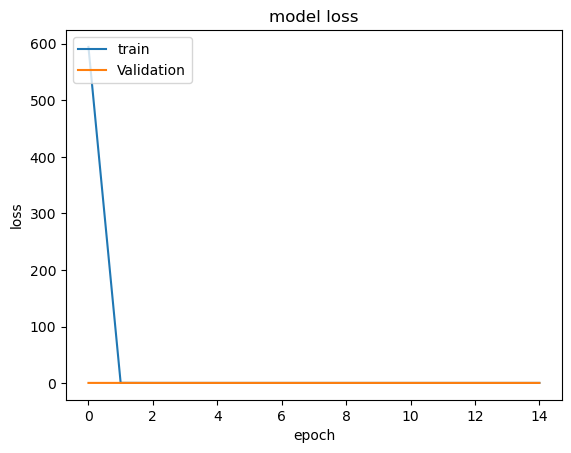

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

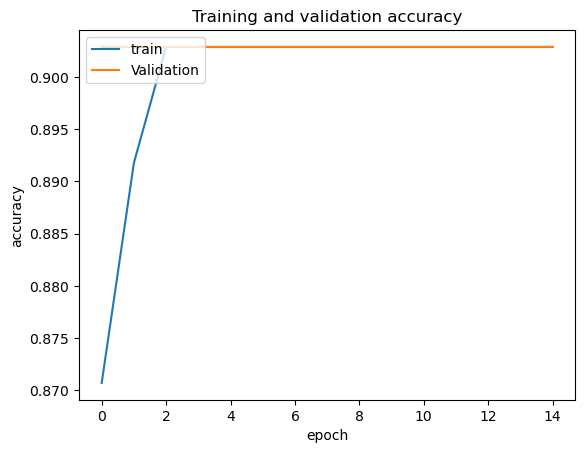

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

## 코드 설명
### 모델 예측:
###### model.predict(X_test): 테스트 데이터 X_test에 대한 예측값을 계산합니다.
###### np.argmax(y_pred, axis=-1): 예측된 원-핫 인코딩을 클래스 인덱스로 변환합니다.
###### np.argmax(y_test_hot, axis=-1): 실제 테스트 데이터 y_test_hot의 원-핫 인코딩을 클래스 인덱스로 변환합니다.
    
### 평가 지표 계산:
###### confusion_matrix(y_true, y_pred): 혼동 행렬을 계산합니다.
###### f1_score(y_true, y_pred, average='weighted'): 가중치가 적용된 F1 점수를 계산합니다.
###### accuracy_score(y_true, y_pred): 정확도를 계산합니다.
###### classification_report(y_true, y_pred): 정밀도, 재현율, F1 점수를 포함한 자세한 분류 보고서를 출력합니다.
    
### 혼동 행렬 시각화:
###### sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='.2f'): 혼동 행렬을 시각화합니다.

7131/7131 [==============================] - 26s 4ms/step
f1_score =  0.8568147893268729
0.9028913032997761
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    206010
           1       0.00      0.00      0.00     22157

    accuracy                           0.90    228167
   macro avg       0.45      0.50      0.47    228167
weighted avg       0.82      0.90      0.86    228167



C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

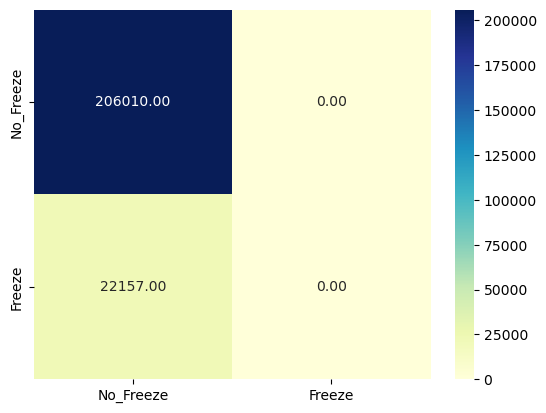

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import numpy as np

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['No_Freeze','Freeze']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

#### 데이터프레임을 사용자 번호(User_Number)로 그룹화하고, 각 그룹 내에서 클래스가 하나 이상인 경우 SMOTE를 사용하여 데이터 불균형을 해결
#### 모든 그룹을 다시 결합하여 최종 데이터프레임을 생성

## 코드 설명
#### 데이터프레임 그룹화:
###### df.groupby('User_Number'): 데이터프레임을 User_Number로 그룹화합니다.

#### 각 그룹에 대해 SMOTE 적용:
###### 각 그룹 내에서 클래스가 두 개 이상인 경우에만 SMOTE를 사용하여 오버샘플링을 수행합니다.
###### 클래스가 하나뿐인 경우 해당 그룹을 그대로 유지합니다.

#### 결과 데이터프레임 재결합:
###### 각 그룹의 결과를 리스트에 추가한 후, 이를 하나의 데이터프레임으로 다시 결합합니다.

In [27]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# 데이터프레임 그룹화
grouped = df.groupby('User_Number')

# 각 그룹에 대해 밸런싱 적용
balanced_dfs = []
for group_name, group_data in grouped:
    # 그룹 내 클래스 개수 확인
    num_classes = group_data['status'].nunique()
    
    # 클래스가 하나 이상인 경우에만 밸런싱 적용, Standing이 존재하지 않는 user가 있어서
    if num_classes > 1:
        # Smote를 통한 Oversampling
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = smote.fit_resample(group_data.drop(['status', 'User_Number'], axis=1), group_data['status'])
        balanced_group_df = pd.concat([pd.DataFrame(X_resampled, columns=group_data.drop(['status', 'User_Number'], axis=1).columns),
                                       pd.DataFrame({'status': y_resampled})], axis=1)

        # 'user_id' 열 추가
        balanced_group_df['User_Number'] = group_name

        balanced_dfs.append(balanced_group_df)
    else:
        balanced_dfs.append(group_data)

# 재결합
balanced_df = pd.concat(balanced_dfs)

# 결과 확인
print(balanced_df.head())

       TS   Ankel_1  Ankel_2  Ankel_3  Thigh_1  Thigh_2  Thigh_3  Trunk_1  \
0  750000       -30      990      326      -45      972      181      -38   
1  750015       -30     1000      356      -18      981      212      -48   
2  750031       -20      990      336       18      981      222      -38   
3  750046       -20     1000      316       36      990      222      -19   
4  750062         0      990      316       36      990      212      -29   

   Trunk_2  Trunk_3  status  User_Number  
0     1000       29       0            1  
1     1028       29       0            1  
2     1038        9       0            1  
3     1038        9       0            1  
4     1038       29       0            1  


#### Freeze' 활동을 하는 사용자와 하지 않는 사용자를 분리하여, 'Freeze' 활동을 하지 않는 사용자에 해당하는 행을 데이터프레임에서 제거


#### 'Freeze' 활동을 하는 User_Number 추출:
###### balanced_df에서 'status'가 1 ('Freeze' 활동)인 행의 User_Number를 추출하여 고유 값만 저장합니다.

#### 'Freeze' 활동을 하지 않는 User_Number 추출:
###### 원본 데이터프레임 df에서 모든 User_Number를 추출하고, 그 중에서 Freeze_users에 포함되지 않은 User_Number를 리스트로 만듭니다.

#### 'Freeze' 활동을 하지 않는 User_Number에 해당하는 행 삭제:
###### balanced_df에서 User_Number가 Freeze_absent_users 리스트에 포함되지 않은 행만 남깁니다.

#### 결과 확인:
###### 최종 데이터프레임을 출력하여 'Freeze' 활동을 하는 사용자만 남아있는지 확인

In [28]:
# 'Freeze' 활동을 하는 User_Number 추출
Freeze_users = balanced_df[balanced_df['status'] == 1]['User_Number'].unique()

# 'Freeze' 활동을 하지 않는 User_Number 추출
Freeze_absent_users = [User_Number for User_Number in df['User_Number'].unique() if User_Number not in Freeze_users]

# 'Freeze' 활동을 하지 않는 User_Number 해당하는 행 삭제
balanced_df = balanced_df[~balanced_df['User_Number'].isin(Freeze_absent_users)]

# 결과 확인
print(balanced_df)

             TS   Ankel_1  Ankel_2  Ankel_3  Thigh_1  Thigh_2  Thigh_3  \
0        750000       -30      990      326      -45      972      181   
1        750015       -30     1000      356      -18      981      212   
2        750031       -20      990      336       18      981      222   
3        750046       -20     1000      316       36      990      222   
4        750062         0      990      316       36      990      212   
...         ...       ...      ...      ...      ...      ...      ...   
188151   719786       296     1047       21     -213      913      206   
188152   457967       -14     1649      261     -802     1205      352   
188153   637802       233      923      -12       13      829      333   
188154  1010843       222     1008       98     -145      962      150   
188155   833621        -1      992      193     -316      894      228   

        Trunk_1  Trunk_2  Trunk_3  status  User_Number  
0           -38     1000       29       0            1

C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


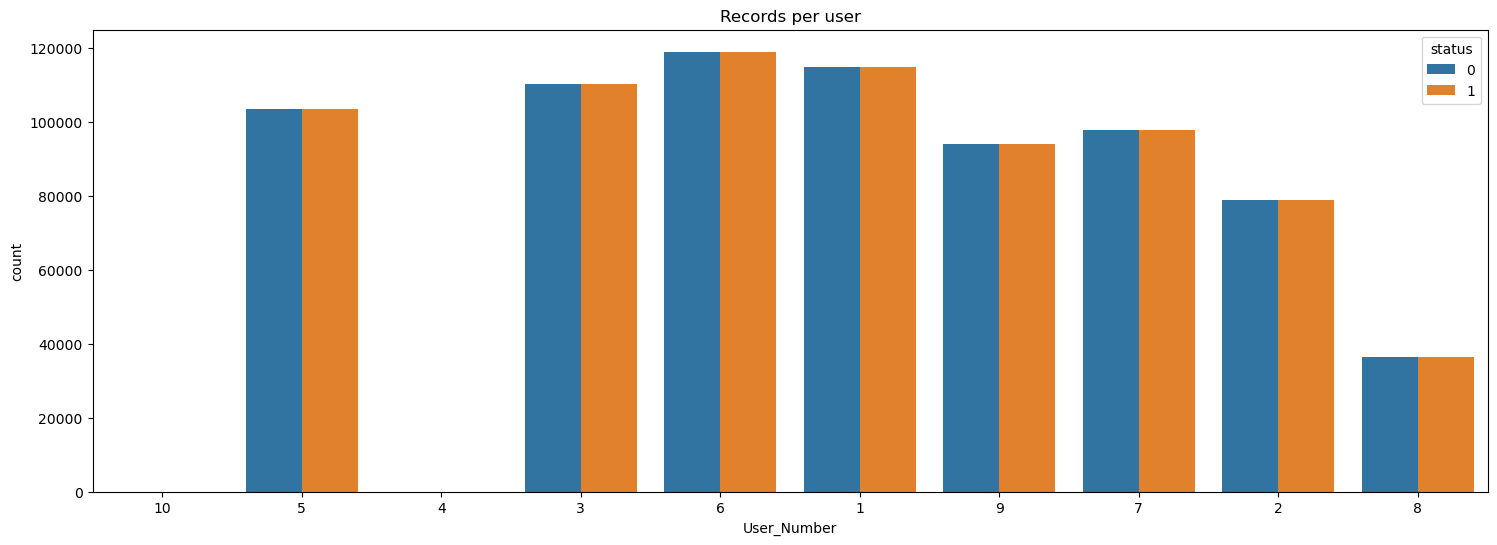

In [29]:
plt.figure(figsize=(18, 6))
sns.countplot(x = "User_Number", hue="status", data = balanced_df,
              order = df.User_Number.value_counts().index)
plt.title("Records per user");

In [33]:
print(balanced_df['User_Number'].value_counts())
print(balanced_df['status'].value_counts())

User_Number
6    237904
1    229818
3    220608
5    206792
7    195658
9    188156
2    157906
8     72850
Name: count, dtype: int64
status
0    754846
1    754846
Name: count, dtype: int64


In [32]:
## 6번 User의 행 개수에 맞춰서 다른 User의 행 개수 밸런싱 (앞의 밸런싱 유지)

#### 데이터프레임을 User_Number로 그룹화하여 각 그룹에 대해 SMOTE를 적용하고, 각 사용자 그룹의 데이터 수를 특정 개수로 맞추는 과정을 수행합니다. 
#### 또한 'Freeze' 활동을 하지 않는 사용자의 데이터를 제거합니다. 마지막으로, 결과 데이터프레임의 사용자별 데이터 수와 상태별 데이터 수를 출력합니다.

## 설명
#### 데이터프레임 그룹화:
###### df.groupby('User_Number'): 데이터프레임을 User_Number로 그룹화합니다.

#### SMOTE를 통한 오버샘플링 및 데이터 개수 조절:
###### 각 그룹에 대해 클래스 개수를 확인하고, 클래스가 두 개 이상인 경우 SMOTE를 사용하여 오버샘플링을 수행합니다.
###### 오버샘플링 후, 각 사용자 그룹의 데이터 수를 max_user_data_count로 맞춥니다.
###### 클래스가 하나뿐인 경우 SMOTE를 적용하지 않고, 데이터 수를 max_user_data_count로 맞춥니다.

#### 결과 데이터프레임 재결합:
###### 모든 그룹의 결과를 하나의 데이터프레임으로 결합합니다.

#### 'Freeze' 활동을 하지 않는 사용자 데이터 제거:
###### 'Freeze' 활동을 하는 사용자 User_Number를 추출하고, 이를 기준으로 'Freeze' 활동을 하지 않는 사용자의 데이터를 제거합니다.

#### 결과 데이터프레임 확인:
###### 최종 데이터프레임의 상위 5개 행을 출력하여 확인합니다.
###### 최종 데이터프레임의 사용자별 데이터 수와 상태별 데이터 수를 출력합니다.


In [34]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# 데이터프레임 그룹화
grouped = df.groupby('User_Number')

# 각 그룹에 대해 밸런싱 적용
balanced_dfs = []
max_user_data_count = 237904  # 6번 User의 데이터 개수를 기준으로 설정

for group_name, group_data in grouped:
    # 그룹 내 클래스 개수 확인
    num_classes = group_data['status'].nunique()
    
    # 최소 데이터 개수를 가진 사용자를 기준으로 전체 데이터 개수 조절
    if num_classes > 1:
        # Smote를 통한 Oversampling
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = smote.fit_resample(group_data.drop(['status', 'User_Number'], axis=1), group_data['status'])
        balanced_group_df = pd.concat([pd.DataFrame(X_resampled, columns=group_data.drop(['status', 'User_Number'], axis=1).columns),
                                       pd.DataFrame({'status': y_resampled})], axis=1)

        # 'user_id' 열 추가
        balanced_group_df['User_Number'] = group_name

        # 데이터 개수 조절
        balanced_group_df = balanced_group_df.sample(n=max_user_data_count, replace=True, random_state=42)

        balanced_dfs.append(balanced_group_df)
    else:
        # 데이터 개수 조절
        group_data = group_data.sample(n=max_user_data_count, replace=True, random_state=42)
        balanced_dfs.append(group_data)

# 재결합
balanced_df = pd.concat(balanced_dfs)

# 결과 확인
print(balanced_df.head())

# 'Freeze' 활동을 하는 User_Number 추출
Freeze_users = balanced_df[balanced_df['status'] == 1]['User_Number'].unique()

# 'Freeze' 활동을 하지 않는 User_Number 추출
Freeze_absent_users = [User_Number for User_Number in df['User_Number'].unique() if User_Number not in Freeze_users]

# 'Freeze' 활동을 하지 않는 User_Number 해당하는 행 삭제
balanced_df = balanced_df[~balanced_df['User_Number'].isin(Freeze_absent_users)]

# 결과 확인
print(balanced_df)

# 결과 확인
print(balanced_df['User_Number'].value_counts())
print(balanced_df['status'].value_counts())

             TS   Ankel_1  Ankel_2  Ankel_3  Thigh_1  Thigh_2  Thigh_3  \
121958  1240254      -107     1039      306      322      956      112   
146867   578537      -249     1047      172       24     1016      118   
131932  1853038      -313      950      227      202     1047      -47   
103694   420187       -70     1019       69     -136      981      101   
119879   673078      -111     1107      118      763      462     -252   

        Trunk_1  Trunk_2  Trunk_3  status  User_Number  
121958      -42      995      -77       1            1  
146867      243     1043      175       1            1  
131932      -97     1035      -10       1            1  
103694      194      990      165       0            1  
119879      504      723      456       0            1  
             TS   Ankel_1  Ankel_2  Ankel_3  Thigh_1  Thigh_2  Thigh_3  \
121958  1240254      -107     1039      306      322      956      112   
146867   578537      -249     1047      172       24     1016    

C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


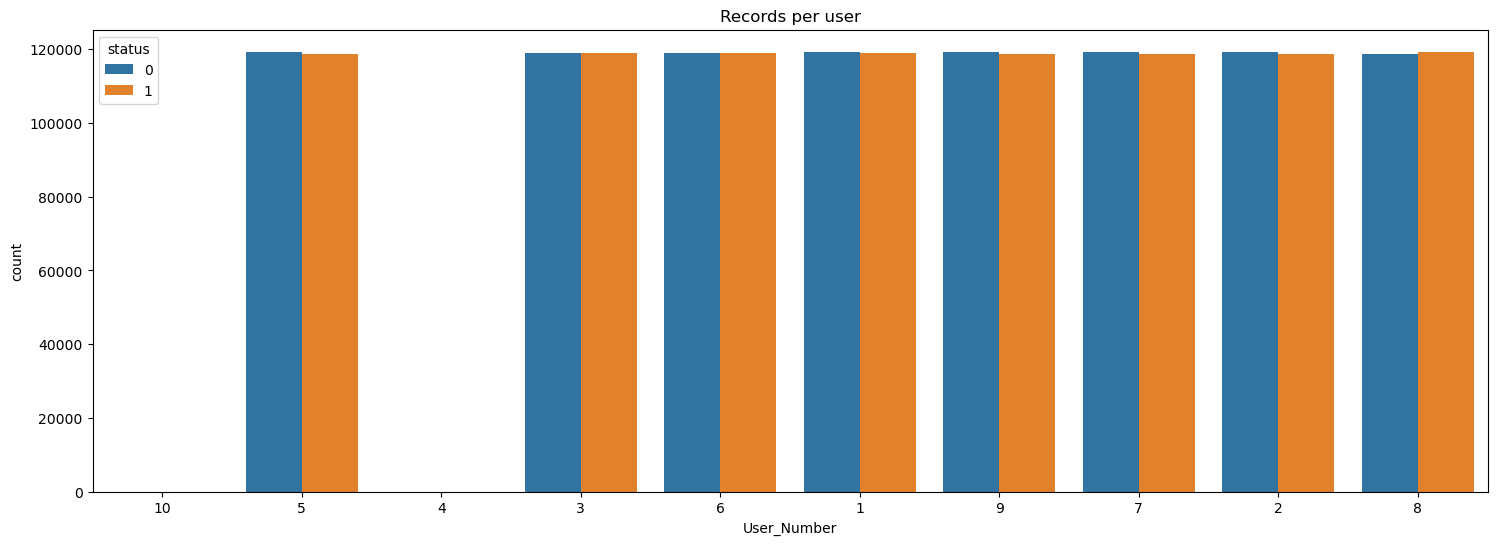

In [35]:
plt.figure(figsize=(18, 6))
sns.countplot(x = "User_Number", hue="status", data = balanced_df,
              order = df.User_Number.value_counts().index)
plt.title("Records per user");

## 이전의 코드와 같습니다.

In [38]:
X = balanced_df[['TS', ' Ankel_1', 'Ankel_2', 'Ankel_3', 'Thigh_1', 'Thigh_2', 'Thigh_3',
       'Trunk_1', 'Trunk_2', 'Trunk_3']].values
y = balanced_df['status'].values.reshape(-1, 1)

In [39]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify= y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1218068, 10) (1218068, 1)
(380647, 10) (380647, 1)


In [40]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(1218068, 10, 1)
(380647, 10, 1)


In [41]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc.fit(y_train)

y_train_hot = enc.transform(y_train) 
y_test_hot = enc.transform(y_test) 
y_val_hot = enc.transform(y_val)

In [42]:
n_status = len(np.unique(y_train_hot))
n_status

2

In [43]:
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train_hot = y_train_hot[idx]

In [44]:
input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 1)]      0           []                               
                                                                                                  
 multi_head_attention_4 (MultiH  (None, 10, 1)       7169        ['input_2[0][0]',                
 eadAttention)                                                    'input_2[0][0]']                
                                                                                                  
 dropout_9 (Dropout)            (None, 10, 1)        0           ['multi_head_attention_4[0][0]'] 
                                                                                                  
 layer_normalization_8 (LayerNo  (None, 10, 1)       2           ['dropout_9[0][0]']        

In [45]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

history = model.fit(
    X_train,
    y_train_hot,
    validation_data=(X_val, y_val_hot),
    epochs=100,
    batch_size=64,
    callbacks=callbacks,
)
model.evaluate(X_test, y_test_hot , verbose=1)

Epoch 1/100
19033/19033 [==============================] - 334s 17ms/step - loss: 452.2497 - accuracy: 0.4995 - val_loss: 0.6933 - val_accuracy: 0.4995
Epoch 2/100
19033/19033 [==============================] - 347s 18ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 3/100
19033/19033 [==============================] - 346s 18ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.4995
Epoch 4/100
19033/19033 [==============================] - 335s 18ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.4995
Epoch 5/100
19033/19033 [==============================] - 330s 17ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 6/100
19033/19033 [==============================] - 324s 17ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 7/100
19033/19033 [==============================] - 323s 17ms/step - loss: 0.6932 - accurac

[0.6931775212287903, 0.4995442032814026]

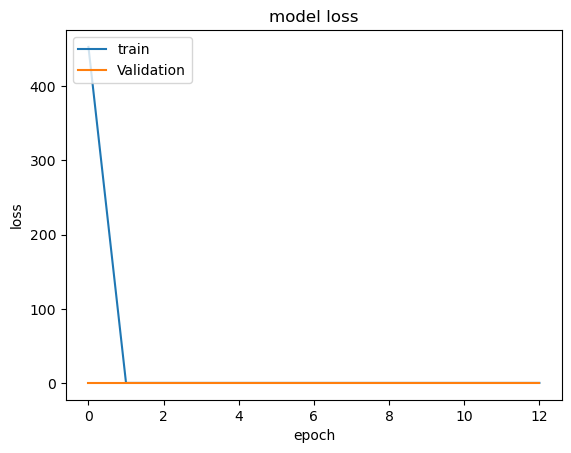

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

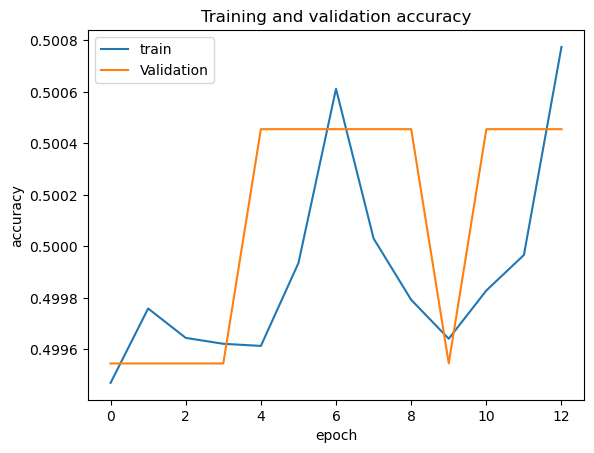

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

11896/11896 [==============================] - 44s 4ms/step
f1_score =  0.3328270088378187
0.4995441971170139


C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    190497
           1       0.50      1.00      0.67    190150

    accuracy                           0.50    380647
   macro avg       0.25      0.50      0.33    380647
weighted avg       0.25      0.50      0.33    380647



C:\Users\GACHON\anaconda3\envs\test01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

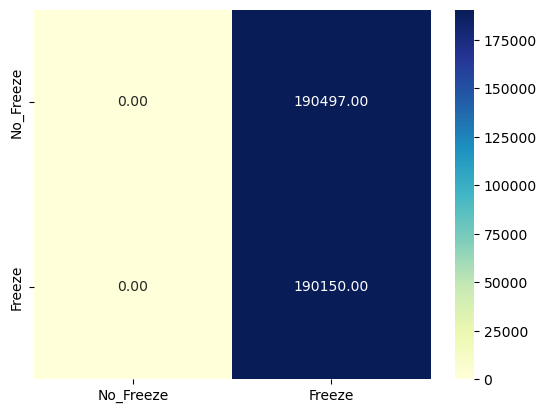

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import numpy as np

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['No_Freeze','Freeze']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')